In [75]:
from IPython.display import Image
Image(url= "https://tulula.sfo2.cdn.digitaloceanspaces.com/prod/images/4a97d9c5492efafcef3af28c65165c13b8e7c899801a98ca8926e2d58a3073ab.png")

# MACHINE LEARNING BASICS WITH PYTHON:USE CASE: CUSTOMER TELECOM CHURN PREDICTION - PYCONNG2019
   ### PRESENTER - FATIMAH TASALLAH RUFAI
   ### CO-PRESENTER - AMINAH MARDIYYAH RUFAI


### TELECOM CHURN PREDICTION

### STEPS 
##### 1. Import the necessary Libaries
##### 2. Import the Dataset
##### 3. Data Preprocessing/Wrangling
##### 4. Data Visualization
##### 5. Training the Model
##### 6.Prediction/Testing the model


In [1]:
#Library for linear algebra
import numpy as np
#Library for Data preprocessing and manipulation
import pandas as pd
#Library for Easy Data Overview
import pandas_profiling as pp
#Libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams
#Library for splitting the dataset
from sklearn.model_selection import train_test_split
#Libraries for Training the Model
from sklearn.linear_model import LogisticRegression ##Logistic Regression classifier
from sklearn.svm import SVC  ##Support Vector Machine Classifier
from sklearn.neighbors import KNeighborsClassifier #K-Nearest Neigbors Classifier
from sklearn.naive_bayes import GaussianNB #Naive bayes CLassifier
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier  ##Random Forest Classifier



# Data Exploration

In [2]:
data = pd.read_csv('Telco-Customer-Churn.csv')


In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
data.shape

(7043, 21)

In [7]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
pp.ProfileReport(data)

Number of variables,21
Number of observations,7043
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,168.0 B
Numeric,2
Categorical,17
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [9]:
data.gender.unique()

array(['Female', 'Male'], dtype=object)

In [10]:
data.DeviceProtection.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [11]:
data['DeviceProtection'] = data['DeviceProtection'].replace({'No internet service':'No'})
data['DeviceProtection'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
data.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [13]:
data['MultipleLines'] = data['MultipleLines'].replace({'No phone service':'No'})
data['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
data.OnlineBackup.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [15]:
data['OnlineBackup'] = data['OnlineBackup'].replace({'No internet service':'No'})
data['OnlineBackup'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
data.OnlineSecurity.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [17]:
data['OnlineSecurity'] = data['OnlineSecurity'].replace({'No internet service':'No'})
data['OnlineSecurity'].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
data.StreamingMovies.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [19]:
data['StreamingMovies'] = data['StreamingMovies'].replace({'No internet service':'No'})
data['StreamingMovies'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
data.StreamingTV.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [21]:
data['StreamingTV'] = data['StreamingTV'].replace({'No internet service':'No'})
data['StreamingTV'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
data.TechSupport.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [23]:
data['TechSupport'] = data['TechSupport'].replace({'No internet service':'No'})
data['TechSupport'].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
data.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [25]:
data.TotalCharges.value_counts().to_frame()

,TotalCharges
20.2,11
,11
19.75,9
19.9,8
19.65,8
20.05,8
19.55,7
45.3,7
19.45,6
20.15,6


In [26]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [27]:
#converting totalcharges from an object to a numeric variable
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')
data.loc[data['TotalCharges'].isna()==True] = 0

In [28]:
data.TotalCharges.dtype

dtype('float64')

# DATA VISUALIZATION

In [29]:
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000200FD267048>,
      dtype=object)

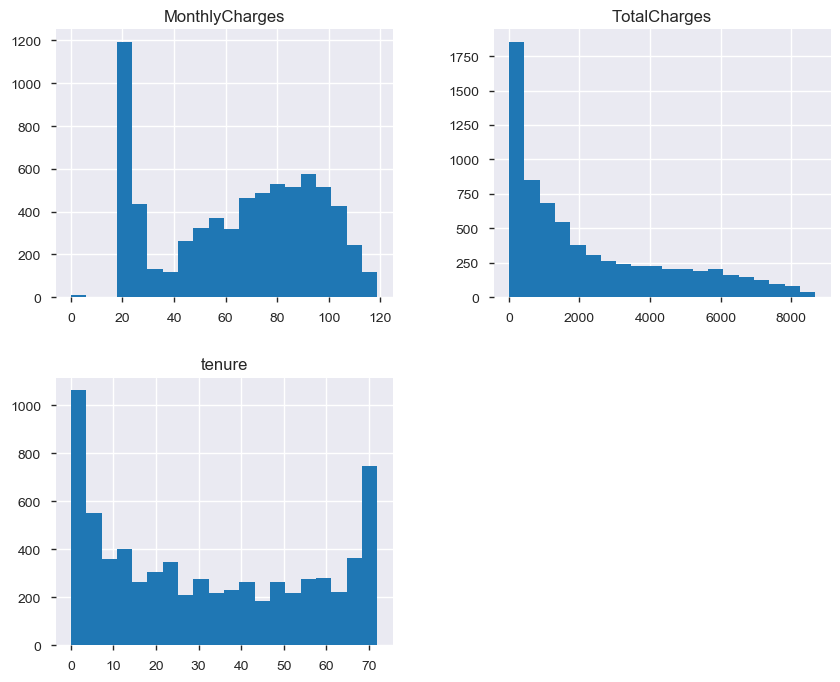

In [30]:
data[numerical_features].hist(bins = 20, figsize = (10, 8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000200FD108710>,
      dtype=object)

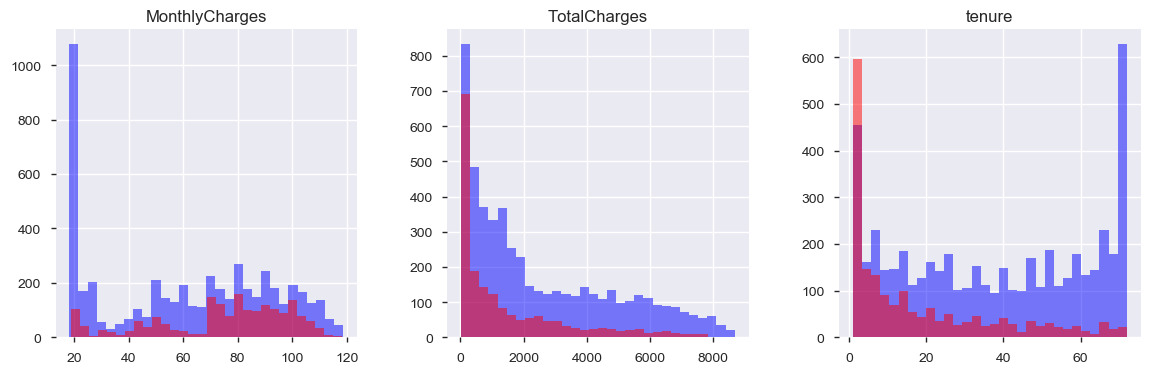

In [31]:
fig, ax = plt.subplots(1, 3, figsize = (14, 4))

data[data.Churn == "No"][numerical_features].hist(bins = 30, color = 'blue', alpha = 0.5, ax = ax)
data[data.Churn == "Yes"][numerical_features].hist(bins = 30, color = 'red', alpha = 0.5, ax = ax)

Text(0.5, 1.0, 'Churned')

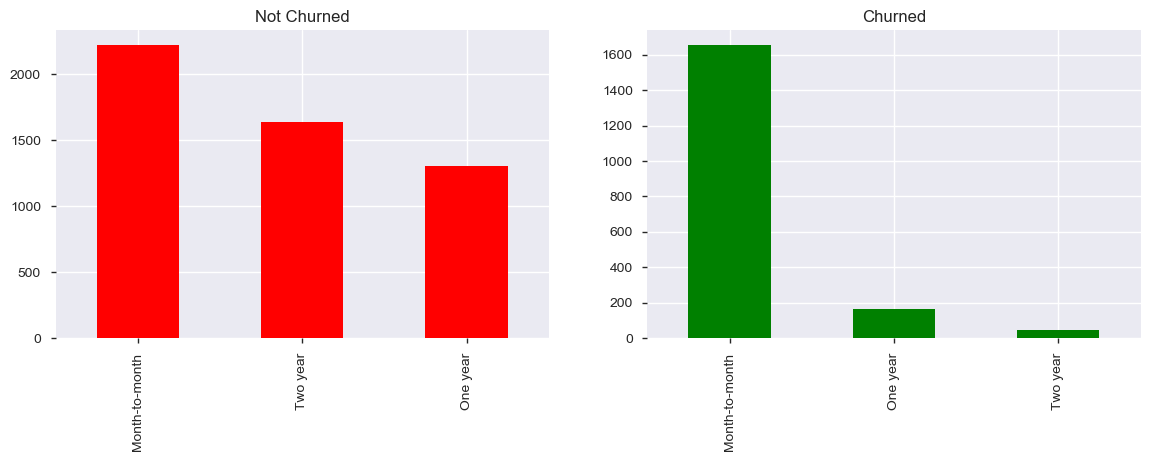

In [32]:
#graphical representation of the contract feature in relation to Churn
feature = 'Contract'
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
data[data.Churn == "No"][feature].value_counts().plot('bar', ax = ax[0], color = 'red').set_title('Not Churned')
data[data.Churn == "Yes"][feature].value_counts().plot('bar', ax = ax[1], color = 'green').set_title('Churned')

In [33]:
X = data.drop(['Churn'], axis =1)
y = data.Churn

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state =42)

In [35]:
from catboost import CatBoostClassifier, Pool, cv
classifier = CatBoostClassifier()

In [36]:
cate_features_index = np.where(X.dtypes != float) [0]; cate_features_index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17], dtype=int64)

In [37]:
classifier = CatBoostClassifier(iterations=5100, depth=7, learning_rate=0.05, eval_metric ='Accuracy',use_best_model=True, random_seed=42)
classifier.fit(X,y,cat_features=cate_features_index,eval_set=(X,y))

0:	learn: 0.7330683	test: 0.7330683	best: 0.7330683 (0)	total: 300ms	remaining: 25m 27s
1:	learn: 0.7330683	test: 0.7330683	best: 0.7330683 (0)	total: 446ms	remaining: 18m 57s
2:	learn: 0.7330683	test: 0.7330683	best: 0.7330683 (0)	total: 578ms	remaining: 16m 22s
3:	learn: 0.7694164	test: 0.7715462	best: 0.7715462 (3)	total: 1.26s	remaining: 26m 50s
4:	learn: 0.7782195	test: 0.7816271	best: 0.7816271 (4)	total: 2.01s	remaining: 34m 13s
5:	learn: 0.7648729	test: 0.7675706	best: 0.7816271 (4)	total: 2.13s	remaining: 30m 8s
6:	learn: 0.7783615	test: 0.7831890	best: 0.7831890 (6)	total: 2.44s	remaining: 29m 32s
7:	learn: 0.7792134	test: 0.7793554	best: 0.7831890 (6)	total: 3.29s	remaining: 34m 55s
8:	learn: 0.7804913	test: 0.7814852	best: 0.7831890 (6)	total: 4.15s	remaining: 39m 5s
9:	learn: 0.7854607	test: 0.7884424	best: 0.7884424 (9)	total: 4.92s	remaining: 41m 44s
10:	learn: 0.7918501	test: 0.7941218	best: 0.7941218 (10)	total: 5.8s	remaining: 44m 43s
11:	learn: 0.7914241	test: 0.7927

92:	learn: 0.8051966	test: 0.8056226	best: 0.8056226 (92)	total: 54.2s	remaining: 48m 36s
93:	learn: 0.8044867	test: 0.8054806	best: 0.8056226 (92)	total: 55.1s	remaining: 48m 52s
94:	learn: 0.8040608	test: 0.8059066	best: 0.8059066 (94)	total: 55.4s	remaining: 48m 38s
95:	learn: 0.8044867	test: 0.8063325	best: 0.8063325 (95)	total: 56.3s	remaining: 48m 52s
96:	learn: 0.8054806	test: 0.8066165	best: 0.8066165 (96)	total: 57.2s	remaining: 49m 7s
97:	learn: 0.8054806	test: 0.8069005	best: 0.8069005 (97)	total: 58s	remaining: 49m 22s
98:	learn: 0.8054806	test: 0.8067585	best: 0.8069005 (97)	total: 58.4s	remaining: 49m 7s
99:	learn: 0.8051966	test: 0.8069005	best: 0.8069005 (97)	total: 58.7s	remaining: 48m 54s
100:	learn: 0.8053386	test: 0.8061905	best: 0.8069005 (97)	total: 58.9s	remaining: 48m 34s
101:	learn: 0.8056226	test: 0.8060486	best: 0.8069005 (97)	total: 59.8s	remaining: 48m 48s
102:	learn: 0.8054806	test: 0.8064745	best: 0.8069005 (97)	total: 1m	remaining: 48m 34s
103:	learn: 0.

181:	learn: 0.8086043	test: 0.8094562	best: 0.8094562 (181)	total: 1m 45s	remaining: 47m 24s
182:	learn: 0.8086043	test: 0.8095982	best: 0.8095982 (182)	total: 1m 46s	remaining: 47m 32s
183:	learn: 0.8091722	test: 0.8088883	best: 0.8095982 (182)	total: 1m 47s	remaining: 47m 39s
184:	learn: 0.8095982	test: 0.8088883	best: 0.8095982 (182)	total: 1m 47s	remaining: 47m 46s
185:	learn: 0.8088883	test: 0.8088883	best: 0.8095982 (182)	total: 1m 47s	remaining: 47m 32s
186:	learn: 0.8088883	test: 0.8088883	best: 0.8095982 (182)	total: 1m 48s	remaining: 47m 38s
187:	learn: 0.8095982	test: 0.8091722	best: 0.8095982 (182)	total: 1m 49s	remaining: 47m 43s
188:	learn: 0.8094562	test: 0.8091722	best: 0.8095982 (182)	total: 1m 50s	remaining: 47m 49s
189:	learn: 0.8097402	test: 0.8088883	best: 0.8095982 (182)	total: 1m 51s	remaining: 47m 57s
190:	learn: 0.8100241	test: 0.8095982	best: 0.8095982 (182)	total: 1m 51s	remaining: 47m 53s
191:	learn: 0.8100241	test: 0.8095982	best: 0.8095982 (182)	total: 1m 

270:	learn: 0.8182593	test: 0.8134318	best: 0.8139997 (268)	total: 2m 54s	remaining: 51m 44s
271:	learn: 0.8184012	test: 0.8139997	best: 0.8139997 (268)	total: 2m 55s	remaining: 51m 47s
272:	learn: 0.8184012	test: 0.8142837	best: 0.8142837 (272)	total: 2m 55s	remaining: 51m 47s
273:	learn: 0.8184012	test: 0.8141417	best: 0.8142837 (272)	total: 2m 56s	remaining: 51m 49s
274:	learn: 0.8184012	test: 0.8138577	best: 0.8142837 (272)	total: 2m 57s	remaining: 51m 52s
275:	learn: 0.8185432	test: 0.8139997	best: 0.8142837 (272)	total: 2m 58s	remaining: 51m 55s
276:	learn: 0.8186852	test: 0.8138577	best: 0.8142837 (272)	total: 2m 58s	remaining: 51m 55s
277:	learn: 0.8186852	test: 0.8141417	best: 0.8142837 (272)	total: 2m 59s	remaining: 51m 57s
278:	learn: 0.8189692	test: 0.8142837	best: 0.8142837 (272)	total: 3m	remaining: 51m 58s
279:	learn: 0.8188272	test: 0.8135738	best: 0.8142837 (272)	total: 3m 1s	remaining: 52m
280:	learn: 0.8191112	test: 0.8134318	best: 0.8142837 (272)	total: 3m 2s	remain

359:	learn: 0.8257845	test: 0.8161295	best: 0.8166974 (354)	total: 4m 6s	remaining: 54m 7s
360:	learn: 0.8256425	test: 0.8161295	best: 0.8166974 (354)	total: 4m 7s	remaining: 54m 8s
361:	learn: 0.8253585	test: 0.8157035	best: 0.8166974 (354)	total: 4m 8s	remaining: 54m 9s
362:	learn: 0.8253585	test: 0.8159875	best: 0.8166974 (354)	total: 4m 9s	remaining: 54m 9s
363:	learn: 0.8253585	test: 0.8158455	best: 0.8166974 (354)	total: 4m 9s	remaining: 54m 10s
364:	learn: 0.8256425	test: 0.8157035	best: 0.8166974 (354)	total: 4m 10s	remaining: 54m 11s
365:	learn: 0.8257845	test: 0.8159875	best: 0.8166974 (354)	total: 4m 11s	remaining: 54m 12s
366:	learn: 0.8257845	test: 0.8157035	best: 0.8166974 (354)	total: 4m 12s	remaining: 54m 14s
367:	learn: 0.8257845	test: 0.8158455	best: 0.8166974 (354)	total: 4m 13s	remaining: 54m 14s
368:	learn: 0.8259265	test: 0.8158455	best: 0.8166974 (354)	total: 4m 13s	remaining: 54m 15s
369:	learn: 0.8259265	test: 0.8154196	best: 0.8166974 (354)	total: 4m 14s	remai

448:	learn: 0.8313219	test: 0.8165554	best: 0.8174074 (418)	total: 5m 19s	remaining: 55m 8s
449:	learn: 0.8316058	test: 0.8168394	best: 0.8174074 (418)	total: 5m 20s	remaining: 55m 8s
450:	learn: 0.8317478	test: 0.8168394	best: 0.8174074 (418)	total: 5m 20s	remaining: 55m 7s
451:	learn: 0.8318898	test: 0.8168394	best: 0.8174074 (418)	total: 5m 21s	remaining: 55m 8s
452:	learn: 0.8321738	test: 0.8168394	best: 0.8174074 (418)	total: 5m 22s	remaining: 55m 7s
453:	learn: 0.8320318	test: 0.8165554	best: 0.8174074 (418)	total: 5m 23s	remaining: 55m 8s
454:	learn: 0.8320318	test: 0.8165554	best: 0.8174074 (418)	total: 5m 24s	remaining: 55m 8s
455:	learn: 0.8323158	test: 0.8162715	best: 0.8174074 (418)	total: 5m 24s	remaining: 55m 8s
456:	learn: 0.8323158	test: 0.8162715	best: 0.8174074 (418)	total: 5m 25s	remaining: 55m 8s
457:	learn: 0.8325997	test: 0.8169814	best: 0.8174074 (418)	total: 5m 26s	remaining: 55m 7s
458:	learn: 0.8330257	test: 0.8165554	best: 0.8174074 (418)	total: 5m 27s	remain

537:	learn: 0.8377112	test: 0.8182593	best: 0.8184012 (527)	total: 6m 30s	remaining: 55m 11s
538:	learn: 0.8379952	test: 0.8184012	best: 0.8184012 (527)	total: 6m 31s	remaining: 55m 11s
539:	learn: 0.8381372	test: 0.8188272	best: 0.8188272 (539)	total: 6m 32s	remaining: 55m 10s
540:	learn: 0.8384211	test: 0.8186852	best: 0.8188272 (539)	total: 6m 32s	remaining: 55m 11s
541:	learn: 0.8384211	test: 0.8186852	best: 0.8188272 (539)	total: 6m 33s	remaining: 55m 10s
542:	learn: 0.8384211	test: 0.8189692	best: 0.8189692 (542)	total: 6m 34s	remaining: 55m 11s
543:	learn: 0.8384211	test: 0.8189692	best: 0.8189692 (542)	total: 6m 35s	remaining: 55m 10s
544:	learn: 0.8384211	test: 0.8191112	best: 0.8191112 (544)	total: 6m 36s	remaining: 55m 11s
545:	learn: 0.8385631	test: 0.8191112	best: 0.8191112 (544)	total: 6m 36s	remaining: 55m 11s
546:	learn: 0.8382791	test: 0.8188272	best: 0.8191112 (544)	total: 6m 37s	remaining: 55m 11s
547:	learn: 0.8382791	test: 0.8192532	best: 0.8192532 (547)	total: 6m 

626:	learn: 0.8425387	test: 0.8195371	best: 0.8199631 (610)	total: 7m 41s	remaining: 54m 52s
627:	learn: 0.8426807	test: 0.8195371	best: 0.8199631 (610)	total: 7m 42s	remaining: 54m 52s
628:	learn: 0.8426807	test: 0.8195371	best: 0.8199631 (610)	total: 7m 43s	remaining: 54m 52s
629:	learn: 0.8425387	test: 0.8191112	best: 0.8199631 (610)	total: 7m 43s	remaining: 54m 51s
630:	learn: 0.8429646	test: 0.8195371	best: 0.8199631 (610)	total: 7m 44s	remaining: 54m 51s
631:	learn: 0.8428227	test: 0.8191112	best: 0.8199631 (610)	total: 7m 45s	remaining: 54m 50s
632:	learn: 0.8431066	test: 0.8192532	best: 0.8199631 (610)	total: 7m 46s	remaining: 54m 50s
633:	learn: 0.8429646	test: 0.8195371	best: 0.8199631 (610)	total: 7m 47s	remaining: 54m 50s
634:	learn: 0.8433906	test: 0.8198211	best: 0.8199631 (610)	total: 7m 47s	remaining: 54m 50s
635:	learn: 0.8435326	test: 0.8198211	best: 0.8199631 (610)	total: 7m 48s	remaining: 54m 49s
636:	learn: 0.8436746	test: 0.8196791	best: 0.8199631 (610)	total: 7m 

715:	learn: 0.8475082	test: 0.8205310	best: 0.8213829 (705)	total: 8m 53s	remaining: 54m 23s
716:	learn: 0.8475082	test: 0.8206730	best: 0.8213829 (705)	total: 8m 53s	remaining: 54m 23s
717:	learn: 0.8473662	test: 0.8206730	best: 0.8213829 (705)	total: 8m 54s	remaining: 54m 23s
718:	learn: 0.8473662	test: 0.8205310	best: 0.8213829 (705)	total: 8m 55s	remaining: 54m 23s
719:	learn: 0.8469402	test: 0.8205310	best: 0.8213829 (705)	total: 8m 56s	remaining: 54m 22s
720:	learn: 0.8470822	test: 0.8203890	best: 0.8213829 (705)	total: 8m 57s	remaining: 54m 22s
721:	learn: 0.8472242	test: 0.8206730	best: 0.8213829 (705)	total: 8m 58s	remaining: 54m 22s
722:	learn: 0.8475082	test: 0.8206730	best: 0.8213829 (705)	total: 8m 58s	remaining: 54m 22s
723:	learn: 0.8472242	test: 0.8208150	best: 0.8213829 (705)	total: 8m 59s	remaining: 54m 22s
724:	learn: 0.8472242	test: 0.8208150	best: 0.8213829 (705)	total: 9m	remaining: 54m 22s
725:	learn: 0.8470822	test: 0.8205310	best: 0.8213829 (705)	total: 9m 1s	r

804:	learn: 0.8514837	test: 0.8216669	best: 0.8216669 (755)	total: 10m 5s	remaining: 53m 48s
805:	learn: 0.8519097	test: 0.8216669	best: 0.8216669 (755)	total: 10m 5s	remaining: 53m 48s
806:	learn: 0.8521937	test: 0.8212409	best: 0.8216669 (755)	total: 10m 6s	remaining: 53m 46s
807:	learn: 0.8524776	test: 0.8213829	best: 0.8216669 (755)	total: 10m 7s	remaining: 53m 46s
808:	learn: 0.8523357	test: 0.8215249	best: 0.8216669 (755)	total: 10m 8s	remaining: 53m 45s
809:	learn: 0.8523357	test: 0.8216669	best: 0.8216669 (755)	total: 10m 9s	remaining: 53m 45s
810:	learn: 0.8524776	test: 0.8220929	best: 0.8220929 (810)	total: 10m 9s	remaining: 53m 44s
811:	learn: 0.8523357	test: 0.8222348	best: 0.8222348 (811)	total: 10m 10s	remaining: 53m 44s
812:	learn: 0.8527616	test: 0.8219509	best: 0.8222348 (811)	total: 10m 11s	remaining: 53m 43s
813:	learn: 0.8527616	test: 0.8218089	best: 0.8222348 (811)	total: 10m 12s	remaining: 53m 43s
814:	learn: 0.8527616	test: 0.8218089	best: 0.8222348 (811)	total: 

892:	learn: 0.8554593	test: 0.8242226	best: 0.8242226 (890)	total: 11m 15s	remaining: 53m 1s
893:	learn: 0.8553173	test: 0.8242226	best: 0.8242226 (890)	total: 11m 16s	remaining: 53m 1s
894:	learn: 0.8556013	test: 0.8245066	best: 0.8245066 (894)	total: 11m 17s	remaining: 53m 1s
895:	learn: 0.8556013	test: 0.8243646	best: 0.8245066 (894)	total: 11m 17s	remaining: 53m
896:	learn: 0.8558853	test: 0.8243646	best: 0.8245066 (894)	total: 11m 18s	remaining: 52m 59s
897:	learn: 0.8564532	test: 0.8245066	best: 0.8245066 (894)	total: 11m 19s	remaining: 52m 58s
898:	learn: 0.8564532	test: 0.8243646	best: 0.8245066 (894)	total: 11m 20s	remaining: 52m 58s
899:	learn: 0.8565952	test: 0.8242226	best: 0.8245066 (894)	total: 11m 20s	remaining: 52m 57s
900:	learn: 0.8567372	test: 0.8243646	best: 0.8245066 (894)	total: 11m 21s	remaining: 52m 57s
901:	learn: 0.8568792	test: 0.8242226	best: 0.8245066 (894)	total: 11m 22s	remaining: 52m 56s
902:	learn: 0.8568792	test: 0.8243646	best: 0.8245066 (894)	total: 

980:	learn: 0.8595769	test: 0.8252165	best: 0.8259265 (947)	total: 12m 25s	remaining: 52m 10s
981:	learn: 0.8595769	test: 0.8250745	best: 0.8259265 (947)	total: 12m 26s	remaining: 52m 9s
982:	learn: 0.8597189	test: 0.8253585	best: 0.8259265 (947)	total: 12m 27s	remaining: 52m 8s
983:	learn: 0.8598609	test: 0.8253585	best: 0.8259265 (947)	total: 12m 27s	remaining: 52m 8s
984:	learn: 0.8597189	test: 0.8256425	best: 0.8259265 (947)	total: 12m 28s	remaining: 52m 7s
985:	learn: 0.8597189	test: 0.8256425	best: 0.8259265 (947)	total: 12m 29s	remaining: 52m 7s
986:	learn: 0.8600028	test: 0.8263524	best: 0.8263524 (986)	total: 12m 30s	remaining: 52m 5s
987:	learn: 0.8600028	test: 0.8262104	best: 0.8263524 (986)	total: 12m 30s	remaining: 52m 5s
988:	learn: 0.8600028	test: 0.8257845	best: 0.8263524 (986)	total: 12m 31s	remaining: 52m 4s
989:	learn: 0.8601448	test: 0.8256425	best: 0.8263524 (986)	total: 12m 32s	remaining: 52m 4s
990:	learn: 0.8604288	test: 0.8255005	best: 0.8263524 (986)	total: 12

1067:	learn: 0.8635525	test: 0.8273463	best: 0.8276303 (1061)	total: 13m 35s	remaining: 51m 18s
1068:	learn: 0.8639784	test: 0.8272043	best: 0.8276303 (1061)	total: 13m 36s	remaining: 51m 17s
1069:	learn: 0.8638364	test: 0.8276303	best: 0.8276303 (1061)	total: 13m 37s	remaining: 51m 17s
1070:	learn: 0.8639784	test: 0.8276303	best: 0.8276303 (1061)	total: 13m 37s	remaining: 51m 16s
1071:	learn: 0.8639784	test: 0.8280562	best: 0.8280562 (1071)	total: 13m 38s	remaining: 51m 15s
1072:	learn: 0.8639784	test: 0.8280562	best: 0.8280562 (1071)	total: 13m 39s	remaining: 51m 14s
1073:	learn: 0.8641204	test: 0.8280562	best: 0.8280562 (1071)	total: 13m 40s	remaining: 51m 13s
1074:	learn: 0.8641204	test: 0.8279142	best: 0.8280562 (1071)	total: 13m 40s	remaining: 51m 13s
1075:	learn: 0.8639784	test: 0.8279142	best: 0.8280562 (1071)	total: 13m 41s	remaining: 51m 13s
1076:	learn: 0.8635525	test: 0.8281982	best: 0.8281982 (1076)	total: 13m 42s	remaining: 51m 12s
1077:	learn: 0.8635525	test: 0.8277723	b

1153:	learn: 0.8671021	test: 0.8274883	best: 0.8283402 (1106)	total: 14m 42s	remaining: 50m 17s
1154:	learn: 0.8673861	test: 0.8274883	best: 0.8283402 (1106)	total: 14m 43s	remaining: 50m 16s
1155:	learn: 0.8669601	test: 0.8279142	best: 0.8283402 (1106)	total: 14m 44s	remaining: 50m 16s
1156:	learn: 0.8671021	test: 0.8279142	best: 0.8283402 (1106)	total: 14m 45s	remaining: 50m 16s
1157:	learn: 0.8671021	test: 0.8280562	best: 0.8283402 (1106)	total: 14m 45s	remaining: 50m 16s
1158:	learn: 0.8671021	test: 0.8276303	best: 0.8283402 (1106)	total: 14m 46s	remaining: 50m 15s
1159:	learn: 0.8672441	test: 0.8274883	best: 0.8283402 (1106)	total: 14m 47s	remaining: 50m 14s
1160:	learn: 0.8672441	test: 0.8281982	best: 0.8283402 (1106)	total: 14m 48s	remaining: 50m 14s
1161:	learn: 0.8673861	test: 0.8280562	best: 0.8283402 (1106)	total: 14m 49s	remaining: 50m 12s
1162:	learn: 0.8673861	test: 0.8281982	best: 0.8283402 (1106)	total: 14m 49s	remaining: 50m 12s
1163:	learn: 0.8672441	test: 0.8273463	b

1239:	learn: 0.8709357	test: 0.8291921	best: 0.8294761 (1237)	total: 15m 51s	remaining: 49m 22s
1240:	learn: 0.8713616	test: 0.8291921	best: 0.8294761 (1237)	total: 15m 52s	remaining: 49m 21s
1241:	learn: 0.8709357	test: 0.8290501	best: 0.8294761 (1237)	total: 15m 53s	remaining: 49m 21s
1242:	learn: 0.8709357	test: 0.8290501	best: 0.8294761 (1237)	total: 15m 54s	remaining: 49m 21s
1243:	learn: 0.8709357	test: 0.8290501	best: 0.8294761 (1237)	total: 15m 55s	remaining: 49m 20s
1244:	learn: 0.8710777	test: 0.8289081	best: 0.8294761 (1237)	total: 15m 55s	remaining: 49m 19s
1245:	learn: 0.8709357	test: 0.8289081	best: 0.8294761 (1237)	total: 15m 56s	remaining: 49m 18s
1246:	learn: 0.8709357	test: 0.8291921	best: 0.8294761 (1237)	total: 15m 57s	remaining: 49m 18s
1247:	learn: 0.8710777	test: 0.8287662	best: 0.8294761 (1237)	total: 15m 58s	remaining: 49m 17s
1248:	learn: 0.8712197	test: 0.8287662	best: 0.8294761 (1237)	total: 15m 59s	remaining: 49m 17s
1249:	learn: 0.8713616	test: 0.8287662	b

1325:	learn: 0.8736334	test: 0.8277723	best: 0.8294761 (1237)	total: 17m	remaining: 48m 24s
1326:	learn: 0.8740593	test: 0.8281982	best: 0.8294761 (1237)	total: 17m 1s	remaining: 48m 23s
1327:	learn: 0.8740593	test: 0.8281982	best: 0.8294761 (1237)	total: 17m 2s	remaining: 48m 22s
1328:	learn: 0.8740593	test: 0.8277723	best: 0.8294761 (1237)	total: 17m 2s	remaining: 48m 22s
1329:	learn: 0.8737754	test: 0.8279142	best: 0.8294761 (1237)	total: 17m 3s	remaining: 48m 21s
1330:	learn: 0.8737754	test: 0.8281982	best: 0.8294761 (1237)	total: 17m 4s	remaining: 48m 21s
1331:	learn: 0.8737754	test: 0.8280562	best: 0.8294761 (1237)	total: 17m 5s	remaining: 48m 19s
1332:	learn: 0.8739174	test: 0.8280562	best: 0.8294761 (1237)	total: 17m 5s	remaining: 48m 19s
1333:	learn: 0.8739174	test: 0.8279142	best: 0.8294761 (1237)	total: 17m 6s	remaining: 48m 18s
1334:	learn: 0.8739174	test: 0.8279142	best: 0.8294761 (1237)	total: 17m 7s	remaining: 48m 17s
1335:	learn: 0.8739174	test: 0.8279142	best: 0.829476

1411:	learn: 0.8784609	test: 0.8290501	best: 0.8299020 (1382)	total: 18m 7s	remaining: 47m 20s
1412:	learn: 0.8786029	test: 0.8290501	best: 0.8299020 (1382)	total: 18m 8s	remaining: 47m 19s
1413:	learn: 0.8786029	test: 0.8290501	best: 0.8299020 (1382)	total: 18m 8s	remaining: 47m 18s
1414:	learn: 0.8786029	test: 0.8290501	best: 0.8299020 (1382)	total: 18m 9s	remaining: 47m 17s
1415:	learn: 0.8784609	test: 0.8289081	best: 0.8299020 (1382)	total: 18m 10s	remaining: 47m 17s
1416:	learn: 0.8787449	test: 0.8286242	best: 0.8299020 (1382)	total: 18m 11s	remaining: 47m 16s
1417:	learn: 0.8788868	test: 0.8289081	best: 0.8299020 (1382)	total: 18m 12s	remaining: 47m 15s
1418:	learn: 0.8791708	test: 0.8287662	best: 0.8299020 (1382)	total: 18m 12s	remaining: 47m 15s
1419:	learn: 0.8791708	test: 0.8286242	best: 0.8299020 (1382)	total: 18m 13s	remaining: 47m 14s
1420:	learn: 0.8793128	test: 0.8286242	best: 0.8299020 (1382)	total: 18m 14s	remaining: 47m 14s
1421:	learn: 0.8783189	test: 0.8291921	best:

1497:	learn: 0.8814426	test: 0.8287662	best: 0.8299020 (1382)	total: 19m 15s	remaining: 46m 18s
1498:	learn: 0.8814426	test: 0.8289081	best: 0.8299020 (1382)	total: 19m 16s	remaining: 46m 17s
1499:	learn: 0.8815846	test: 0.8286242	best: 0.8299020 (1382)	total: 19m 16s	remaining: 46m 16s
1500:	learn: 0.8815846	test: 0.8286242	best: 0.8299020 (1382)	total: 19m 17s	remaining: 46m 15s
1501:	learn: 0.8815846	test: 0.8289081	best: 0.8299020 (1382)	total: 19m 18s	remaining: 46m 14s
1502:	learn: 0.8815846	test: 0.8290501	best: 0.8299020 (1382)	total: 19m 19s	remaining: 46m 14s
1503:	learn: 0.8815846	test: 0.8290501	best: 0.8299020 (1382)	total: 19m 19s	remaining: 46m 13s
1504:	learn: 0.8814426	test: 0.8287662	best: 0.8299020 (1382)	total: 19m 20s	remaining: 46m 12s
1505:	learn: 0.8815846	test: 0.8284822	best: 0.8299020 (1382)	total: 19m 21s	remaining: 46m 11s
1506:	learn: 0.8817265	test: 0.8281982	best: 0.8299020 (1382)	total: 19m 22s	remaining: 46m 10s
1507:	learn: 0.8815846	test: 0.8287662	b

1583:	learn: 0.8831464	test: 0.8299020	best: 0.8307539 (1570)	total: 20m 24s	remaining: 45m 18s
1584:	learn: 0.8832884	test: 0.8297600	best: 0.8307539 (1570)	total: 20m 25s	remaining: 45m 17s
1585:	learn: 0.8832884	test: 0.8299020	best: 0.8307539 (1570)	total: 20m 26s	remaining: 45m 16s
1586:	learn: 0.8832884	test: 0.8303280	best: 0.8307539 (1570)	total: 20m 26s	remaining: 45m 15s
1587:	learn: 0.8834304	test: 0.8303280	best: 0.8307539 (1570)	total: 20m 27s	remaining: 45m 14s
1588:	learn: 0.8837143	test: 0.8301860	best: 0.8307539 (1570)	total: 20m 28s	remaining: 45m 14s
1589:	learn: 0.8838563	test: 0.8303280	best: 0.8307539 (1570)	total: 20m 29s	remaining: 45m 13s
1590:	learn: 0.8838563	test: 0.8303280	best: 0.8307539 (1570)	total: 20m 29s	remaining: 45m 12s
1591:	learn: 0.8838563	test: 0.8306120	best: 0.8307539 (1570)	total: 20m 30s	remaining: 45m 11s
1592:	learn: 0.8837143	test: 0.8303280	best: 0.8307539 (1570)	total: 20m 31s	remaining: 45m 10s
1593:	learn: 0.8837143	test: 0.8304700	b

1669:	learn: 0.8866960	test: 0.8308959	best: 0.8316058 (1664)	total: 21m 32s	remaining: 44m 14s
1670:	learn: 0.8866960	test: 0.8313219	best: 0.8316058 (1664)	total: 21m 33s	remaining: 44m 13s
1671:	learn: 0.8865540	test: 0.8311799	best: 0.8316058 (1664)	total: 21m 33s	remaining: 44m 12s
1672:	learn: 0.8861281	test: 0.8313219	best: 0.8316058 (1664)	total: 21m 34s	remaining: 44m 12s
1673:	learn: 0.8861281	test: 0.8313219	best: 0.8316058 (1664)	total: 21m 35s	remaining: 44m 11s
1674:	learn: 0.8861281	test: 0.8313219	best: 0.8316058 (1664)	total: 21m 36s	remaining: 44m 10s
1675:	learn: 0.8862701	test: 0.8306120	best: 0.8316058 (1664)	total: 21m 37s	remaining: 44m 10s
1676:	learn: 0.8865540	test: 0.8308959	best: 0.8316058 (1664)	total: 21m 37s	remaining: 44m 9s
1677:	learn: 0.8865540	test: 0.8307539	best: 0.8316058 (1664)	total: 21m 38s	remaining: 44m 8s
1678:	learn: 0.8864120	test: 0.8310379	best: 0.8316058 (1664)	total: 21m 39s	remaining: 44m 7s
1679:	learn: 0.8866960	test: 0.8308959	best

1756:	learn: 0.8883998	test: 0.8311799	best: 0.8317478 (1754)	total: 22m 38s	remaining: 43m 5s
1757:	learn: 0.8883998	test: 0.8311799	best: 0.8317478 (1754)	total: 22m 39s	remaining: 43m 4s
1758:	learn: 0.8886838	test: 0.8311799	best: 0.8317478 (1754)	total: 22m 40s	remaining: 43m 3s
1759:	learn: 0.8888258	test: 0.8311799	best: 0.8317478 (1754)	total: 22m 41s	remaining: 43m 2s
1760:	learn: 0.8885418	test: 0.8311799	best: 0.8317478 (1754)	total: 22m 41s	remaining: 43m 2s
1761:	learn: 0.8885418	test: 0.8311799	best: 0.8317478 (1754)	total: 22m 42s	remaining: 43m 1s
1762:	learn: 0.8885418	test: 0.8313219	best: 0.8317478 (1754)	total: 22m 43s	remaining: 43m 1s
1763:	learn: 0.8888258	test: 0.8311799	best: 0.8317478 (1754)	total: 22m 44s	remaining: 43m
1764:	learn: 0.8886838	test: 0.8310379	best: 0.8317478 (1754)	total: 22m 45s	remaining: 42m 59s
1765:	learn: 0.8888258	test: 0.8310379	best: 0.8317478 (1754)	total: 22m 45s	remaining: 42m 58s
1766:	learn: 0.8888258	test: 0.8310379	best: 0.8317

1842:	learn: 0.8913815	test: 0.8316058	best: 0.8318898 (1838)	total: 23m 46s	remaining: 42m 1s
1843:	learn: 0.8913815	test: 0.8316058	best: 0.8318898 (1838)	total: 23m 47s	remaining: 42m
1844:	learn: 0.8912395	test: 0.8317478	best: 0.8318898 (1838)	total: 23m 48s	remaining: 41m 59s
1845:	learn: 0.8915235	test: 0.8318898	best: 0.8318898 (1838)	total: 23m 49s	remaining: 41m 59s
1846:	learn: 0.8915235	test: 0.8313219	best: 0.8318898 (1838)	total: 23m 49s	remaining: 41m 58s
1847:	learn: 0.8913815	test: 0.8317478	best: 0.8318898 (1838)	total: 23m 50s	remaining: 41m 57s
1848:	learn: 0.8913815	test: 0.8320318	best: 0.8320318 (1848)	total: 23m 51s	remaining: 41m 56s
1849:	learn: 0.8912395	test: 0.8321738	best: 0.8321738 (1849)	total: 23m 52s	remaining: 41m 55s
1850:	learn: 0.8913815	test: 0.8318898	best: 0.8321738 (1849)	total: 23m 53s	remaining: 41m 55s
1851:	learn: 0.8915235	test: 0.8320318	best: 0.8321738 (1849)	total: 23m 53s	remaining: 41m 54s
1852:	learn: 0.8920914	test: 0.8320318	best: 

1928:	learn: 0.8947892	test: 0.8317478	best: 0.8321738 (1849)	total: 24m 55s	remaining: 40m 58s
1929:	learn: 0.8947892	test: 0.8318898	best: 0.8321738 (1849)	total: 24m 56s	remaining: 40m 57s
1930:	learn: 0.8943632	test: 0.8316058	best: 0.8321738 (1849)	total: 24m 56s	remaining: 40m 56s
1931:	learn: 0.8943632	test: 0.8317478	best: 0.8321738 (1849)	total: 24m 57s	remaining: 40m 55s
1932:	learn: 0.8947892	test: 0.8321738	best: 0.8321738 (1849)	total: 24m 58s	remaining: 40m 54s
1933:	learn: 0.8949311	test: 0.8320318	best: 0.8321738 (1849)	total: 24m 59s	remaining: 40m 54s
1934:	learn: 0.8949311	test: 0.8324578	best: 0.8324578 (1934)	total: 24m 59s	remaining: 40m 53s
1935:	learn: 0.8949311	test: 0.8321738	best: 0.8324578 (1934)	total: 25m	remaining: 40m 52s
1936:	learn: 0.8947892	test: 0.8318898	best: 0.8324578 (1934)	total: 25m 1s	remaining: 40m 51s
1937:	learn: 0.8949311	test: 0.8321738	best: 0.8324578 (1934)	total: 25m 2s	remaining: 40m 50s
1938:	learn: 0.8949311	test: 0.8321738	best: 0

2014:	learn: 0.8987647	test: 0.8325997	best: 0.8331677 (2011)	total: 26m 3s	remaining: 39m 53s
2015:	learn: 0.8987647	test: 0.8327417	best: 0.8331677 (2011)	total: 26m 3s	remaining: 39m 52s
2016:	learn: 0.8987647	test: 0.8328837	best: 0.8331677 (2011)	total: 26m 4s	remaining: 39m 51s
2017:	learn: 0.8987647	test: 0.8330257	best: 0.8331677 (2011)	total: 26m 5s	remaining: 39m 50s
2018:	learn: 0.8989067	test: 0.8330257	best: 0.8331677 (2011)	total: 26m 6s	remaining: 39m 50s
2019:	learn: 0.8987647	test: 0.8330257	best: 0.8331677 (2011)	total: 26m 6s	remaining: 39m 49s
2020:	learn: 0.8989067	test: 0.8328837	best: 0.8331677 (2011)	total: 26m 7s	remaining: 39m 48s
2021:	learn: 0.8987647	test: 0.8331677	best: 0.8331677 (2011)	total: 26m 8s	remaining: 39m 47s
2022:	learn: 0.8989067	test: 0.8331677	best: 0.8331677 (2011)	total: 26m 9s	remaining: 39m 46s
2023:	learn: 0.8989067	test: 0.8333097	best: 0.8333097 (2023)	total: 26m 9s	remaining: 39m 45s
2024:	learn: 0.8991907	test: 0.8333097	best: 0.833

2100:	learn: 0.9017464	test: 0.8330257	best: 0.8337356 (2039)	total: 27m 9s	remaining: 38m 46s
2101:	learn: 0.9020304	test: 0.8330257	best: 0.8337356 (2039)	total: 27m 10s	remaining: 38m 45s
2102:	learn: 0.9020304	test: 0.8330257	best: 0.8337356 (2039)	total: 27m 11s	remaining: 38m 44s
2103:	learn: 0.9020304	test: 0.8331677	best: 0.8337356 (2039)	total: 27m 12s	remaining: 38m 43s
2104:	learn: 0.9021724	test: 0.8334517	best: 0.8337356 (2039)	total: 27m 12s	remaining: 38m 43s
2105:	learn: 0.9023144	test: 0.8333097	best: 0.8337356 (2039)	total: 27m 13s	remaining: 38m 42s
2106:	learn: 0.9028823	test: 0.8330257	best: 0.8337356 (2039)	total: 27m 14s	remaining: 38m 41s
2107:	learn: 0.9031663	test: 0.8327417	best: 0.8337356 (2039)	total: 27m 15s	remaining: 38m 40s
2108:	learn: 0.9031663	test: 0.8325997	best: 0.8337356 (2039)	total: 27m 16s	remaining: 38m 40s
2109:	learn: 0.9033082	test: 0.8328837	best: 0.8337356 (2039)	total: 27m 16s	remaining: 38m 39s
2110:	learn: 0.9031663	test: 0.8331677	be

2186:	learn: 0.9060060	test: 0.8340196	best: 0.8344455 (2168)	total: 28m 18s	remaining: 37m 41s
2187:	learn: 0.9057220	test: 0.8340196	best: 0.8344455 (2168)	total: 28m 19s	remaining: 37m 41s
2188:	learn: 0.9058640	test: 0.8340196	best: 0.8344455 (2168)	total: 28m 19s	remaining: 37m 40s
2189:	learn: 0.9061479	test: 0.8340196	best: 0.8344455 (2168)	total: 28m 20s	remaining: 37m 39s
2190:	learn: 0.9062899	test: 0.8337356	best: 0.8344455 (2168)	total: 28m 21s	remaining: 37m 39s
2191:	learn: 0.9061479	test: 0.8337356	best: 0.8344455 (2168)	total: 28m 22s	remaining: 37m 38s
2192:	learn: 0.9064319	test: 0.8338776	best: 0.8344455 (2168)	total: 28m 23s	remaining: 37m 37s
2193:	learn: 0.9062899	test: 0.8337356	best: 0.8344455 (2168)	total: 28m 24s	remaining: 37m 37s
2194:	learn: 0.9062899	test: 0.8337356	best: 0.8344455 (2168)	total: 28m 24s	remaining: 37m 36s
2195:	learn: 0.9062899	test: 0.8337356	best: 0.8344455 (2168)	total: 28m 25s	remaining: 37m 35s
2196:	learn: 0.9065739	test: 0.8337356	b

2272:	learn: 0.9091296	test: 0.8341616	best: 0.8344455 (2168)	total: 29m 26s	remaining: 36m 36s
2273:	learn: 0.9091296	test: 0.8340196	best: 0.8344455 (2168)	total: 29m 27s	remaining: 36m 36s
2274:	learn: 0.9094136	test: 0.8337356	best: 0.8344455 (2168)	total: 29m 27s	remaining: 36m 35s
2275:	learn: 0.9092716	test: 0.8337356	best: 0.8344455 (2168)	total: 29m 28s	remaining: 36m 34s
2276:	learn: 0.9092716	test: 0.8337356	best: 0.8344455 (2168)	total: 29m 29s	remaining: 36m 33s
2277:	learn: 0.9091296	test: 0.8335936	best: 0.8344455 (2168)	total: 29m 30s	remaining: 36m 33s
2278:	learn: 0.9092716	test: 0.8343036	best: 0.8344455 (2168)	total: 29m 31s	remaining: 36m 32s
2279:	learn: 0.9091296	test: 0.8340196	best: 0.8344455 (2168)	total: 29m 31s	remaining: 36m 31s
2280:	learn: 0.9095556	test: 0.8334517	best: 0.8344455 (2168)	total: 29m 32s	remaining: 36m 30s
2281:	learn: 0.9094136	test: 0.8333097	best: 0.8344455 (2168)	total: 29m 33s	remaining: 36m 29s
2282:	learn: 0.9092716	test: 0.8334517	b

2358:	learn: 0.9119693	test: 0.8341616	best: 0.8348715 (2354)	total: 30m 32s	remaining: 35m 29s
2359:	learn: 0.9121113	test: 0.8343036	best: 0.8348715 (2354)	total: 30m 33s	remaining: 35m 29s
2360:	learn: 0.9118273	test: 0.8343036	best: 0.8348715 (2354)	total: 30m 34s	remaining: 35m 28s
2361:	learn: 0.9118273	test: 0.8343036	best: 0.8348715 (2354)	total: 30m 35s	remaining: 35m 27s
2362:	learn: 0.9122533	test: 0.8345875	best: 0.8348715 (2354)	total: 30m 36s	remaining: 35m 26s
2363:	learn: 0.9121113	test: 0.8345875	best: 0.8348715 (2354)	total: 30m 36s	remaining: 35m 26s
2364:	learn: 0.9122533	test: 0.8347295	best: 0.8348715 (2354)	total: 30m 37s	remaining: 35m 25s
2365:	learn: 0.9128212	test: 0.8347295	best: 0.8348715 (2354)	total: 30m 38s	remaining: 35m 24s
2366:	learn: 0.9126793	test: 0.8344455	best: 0.8348715 (2354)	total: 30m 39s	remaining: 35m 23s
2367:	learn: 0.9128212	test: 0.8344455	best: 0.8348715 (2354)	total: 30m 39s	remaining: 35m 22s
2368:	learn: 0.9129632	test: 0.8345875	b

2444:	learn: 0.9142411	test: 0.8350135	best: 0.8354394 (2412)	total: 31m 40s	remaining: 34m 23s
2445:	learn: 0.9142411	test: 0.8348715	best: 0.8354394 (2412)	total: 31m 41s	remaining: 34m 23s
2446:	learn: 0.9143831	test: 0.8350135	best: 0.8354394 (2412)	total: 31m 42s	remaining: 34m 22s
2447:	learn: 0.9142411	test: 0.8350135	best: 0.8354394 (2412)	total: 31m 42s	remaining: 34m 21s
2448:	learn: 0.9145251	test: 0.8350135	best: 0.8354394 (2412)	total: 31m 43s	remaining: 34m 20s
2449:	learn: 0.9145251	test: 0.8348715	best: 0.8354394 (2412)	total: 31m 44s	remaining: 34m 20s
2450:	learn: 0.9146670	test: 0.8350135	best: 0.8354394 (2412)	total: 31m 45s	remaining: 34m 19s
2451:	learn: 0.9145251	test: 0.8348715	best: 0.8354394 (2412)	total: 31m 46s	remaining: 34m 18s
2452:	learn: 0.9145251	test: 0.8348715	best: 0.8354394 (2412)	total: 31m 46s	remaining: 34m 17s
2453:	learn: 0.9143831	test: 0.8351555	best: 0.8354394 (2412)	total: 31m 47s	remaining: 34m 16s
2454:	learn: 0.9146670	test: 0.8348715	b

2530:	learn: 0.9176487	test: 0.8347295	best: 0.8355814 (2482)	total: 32m 48s	remaining: 33m 17s
2531:	learn: 0.9182167	test: 0.8347295	best: 0.8355814 (2482)	total: 32m 48s	remaining: 33m 16s
2532:	learn: 0.9182167	test: 0.8345875	best: 0.8355814 (2482)	total: 32m 49s	remaining: 33m 16s
2533:	learn: 0.9180747	test: 0.8345875	best: 0.8355814 (2482)	total: 32m 50s	remaining: 33m 15s
2534:	learn: 0.9180747	test: 0.8347295	best: 0.8355814 (2482)	total: 32m 51s	remaining: 33m 14s
2535:	learn: 0.9180747	test: 0.8348715	best: 0.8355814 (2482)	total: 32m 51s	remaining: 33m 13s
2536:	learn: 0.9179327	test: 0.8348715	best: 0.8355814 (2482)	total: 32m 52s	remaining: 33m 12s
2537:	learn: 0.9182167	test: 0.8351555	best: 0.8355814 (2482)	total: 32m 53s	remaining: 33m 12s
2538:	learn: 0.9180747	test: 0.8352975	best: 0.8355814 (2482)	total: 32m 54s	remaining: 33m 11s
2539:	learn: 0.9183587	test: 0.8351555	best: 0.8355814 (2482)	total: 32m 55s	remaining: 33m 10s
2540:	learn: 0.9182167	test: 0.8351555	b

2616:	learn: 0.9204884	test: 0.8368593	best: 0.8374272 (2613)	total: 33m 55s	remaining: 32m 11s
2617:	learn: 0.9202045	test: 0.8372852	best: 0.8374272 (2613)	total: 33m 56s	remaining: 32m 10s
2618:	learn: 0.9202045	test: 0.8374272	best: 0.8374272 (2613)	total: 33m 57s	remaining: 32m 9s
2619:	learn: 0.9202045	test: 0.8367173	best: 0.8374272 (2613)	total: 33m 58s	remaining: 32m 9s
2620:	learn: 0.9200625	test: 0.8365753	best: 0.8374272 (2613)	total: 33m 58s	remaining: 32m 8s
2621:	learn: 0.9203464	test: 0.8365753	best: 0.8374272 (2613)	total: 33m 59s	remaining: 32m 7s
2622:	learn: 0.9199205	test: 0.8365753	best: 0.8374272 (2613)	total: 34m	remaining: 32m 6s
2623:	learn: 0.9199205	test: 0.8365753	best: 0.8374272 (2613)	total: 34m	remaining: 32m 5s
2624:	learn: 0.9202045	test: 0.8367173	best: 0.8374272 (2613)	total: 34m 1s	remaining: 32m 4s
2625:	learn: 0.9203464	test: 0.8368593	best: 0.8374272 (2613)	total: 34m 2s	remaining: 32m 3s
2626:	learn: 0.9203464	test: 0.8367173	best: 0.8374272 (26

2702:	learn: 0.9233281	test: 0.8367173	best: 0.8374272 (2613)	total: 35m 4s	remaining: 31m 6s
2703:	learn: 0.9233281	test: 0.8364333	best: 0.8374272 (2613)	total: 35m 5s	remaining: 31m 5s
2704:	learn: 0.9233281	test: 0.8365753	best: 0.8374272 (2613)	total: 35m 6s	remaining: 31m 4s
2705:	learn: 0.9233281	test: 0.8365753	best: 0.8374272 (2613)	total: 35m 7s	remaining: 31m 4s
2706:	learn: 0.9233281	test: 0.8362914	best: 0.8374272 (2613)	total: 35m 8s	remaining: 31m 3s
2707:	learn: 0.9233281	test: 0.8360074	best: 0.8374272 (2613)	total: 35m 9s	remaining: 31m 2s
2708:	learn: 0.9233281	test: 0.8361494	best: 0.8374272 (2613)	total: 35m 10s	remaining: 31m 2s
2709:	learn: 0.9231861	test: 0.8367173	best: 0.8374272 (2613)	total: 35m 10s	remaining: 31m 1s
2710:	learn: 0.9233281	test: 0.8368593	best: 0.8374272 (2613)	total: 35m 11s	remaining: 31m
2711:	learn: 0.9231861	test: 0.8364333	best: 0.8374272 (2613)	total: 35m 12s	remaining: 31m
2712:	learn: 0.9233281	test: 0.8364333	best: 0.8374272 (2613)	

2788:	learn: 0.9251739	test: 0.8368593	best: 0.8375692 (2762)	total: 36m 16s	remaining: 30m 3s
2789:	learn: 0.9254579	test: 0.8367173	best: 0.8375692 (2762)	total: 36m 17s	remaining: 30m 2s
2790:	learn: 0.9255999	test: 0.8367173	best: 0.8375692 (2762)	total: 36m 18s	remaining: 30m 2s
2791:	learn: 0.9258839	test: 0.8367173	best: 0.8375692 (2762)	total: 36m 19s	remaining: 30m 1s
2792:	learn: 0.9255999	test: 0.8368593	best: 0.8375692 (2762)	total: 36m 19s	remaining: 30m
2793:	learn: 0.9257419	test: 0.8368593	best: 0.8375692 (2762)	total: 36m 20s	remaining: 29m 59s
2794:	learn: 0.9255999	test: 0.8371433	best: 0.8375692 (2762)	total: 36m 21s	remaining: 29m 59s
2795:	learn: 0.9255999	test: 0.8370013	best: 0.8375692 (2762)	total: 36m 22s	remaining: 29m 58s
2796:	learn: 0.9255999	test: 0.8371433	best: 0.8375692 (2762)	total: 36m 23s	remaining: 29m 57s
2797:	learn: 0.9255999	test: 0.8370013	best: 0.8375692 (2762)	total: 36m 23s	remaining: 29m 56s
2798:	learn: 0.9257419	test: 0.8370013	best: 0.8

2874:	learn: 0.9268778	test: 0.8375692	best: 0.8379952 (2848)	total: 37m 26s	remaining: 28m 58s
2875:	learn: 0.9271617	test: 0.8374272	best: 0.8379952 (2848)	total: 37m 26s	remaining: 28m 57s
2876:	learn: 0.9270197	test: 0.8374272	best: 0.8379952 (2848)	total: 37m 27s	remaining: 28m 56s
2877:	learn: 0.9271617	test: 0.8375692	best: 0.8379952 (2848)	total: 37m 28s	remaining: 28m 56s
2878:	learn: 0.9271617	test: 0.8377112	best: 0.8379952 (2848)	total: 37m 29s	remaining: 28m 55s
2879:	learn: 0.9271617	test: 0.8375692	best: 0.8379952 (2848)	total: 37m 30s	remaining: 28m 54s
2880:	learn: 0.9271617	test: 0.8375692	best: 0.8379952 (2848)	total: 37m 30s	remaining: 28m 53s
2881:	learn: 0.9271617	test: 0.8375692	best: 0.8379952 (2848)	total: 37m 31s	remaining: 28m 53s
2882:	learn: 0.9271617	test: 0.8375692	best: 0.8379952 (2848)	total: 37m 32s	remaining: 28m 52s
2883:	learn: 0.9271617	test: 0.8372852	best: 0.8379952 (2848)	total: 37m 33s	remaining: 28m 51s
2884:	learn: 0.9273037	test: 0.8371433	b

2960:	learn: 0.9295755	test: 0.8382791	best: 0.8382791 (2949)	total: 38m 34s	remaining: 27m 51s
2961:	learn: 0.9298594	test: 0.8382791	best: 0.8382791 (2949)	total: 38m 35s	remaining: 27m 51s
2962:	learn: 0.9298594	test: 0.8382791	best: 0.8382791 (2949)	total: 38m 35s	remaining: 27m 50s
2963:	learn: 0.9300014	test: 0.8382791	best: 0.8382791 (2949)	total: 38m 36s	remaining: 27m 49s
2964:	learn: 0.9300014	test: 0.8378532	best: 0.8382791 (2949)	total: 38m 37s	remaining: 27m 48s
2965:	learn: 0.9298594	test: 0.8375692	best: 0.8382791 (2949)	total: 38m 38s	remaining: 27m 47s
2966:	learn: 0.9298594	test: 0.8374272	best: 0.8382791 (2949)	total: 38m 38s	remaining: 27m 47s
2967:	learn: 0.9300014	test: 0.8374272	best: 0.8382791 (2949)	total: 38m 39s	remaining: 27m 46s
2968:	learn: 0.9300014	test: 0.8375692	best: 0.8382791 (2949)	total: 38m 40s	remaining: 27m 45s
2969:	learn: 0.9298594	test: 0.8377112	best: 0.8382791 (2949)	total: 38m 41s	remaining: 27m 44s
2970:	learn: 0.9300014	test: 0.8377112	b

3046:	learn: 0.9321312	test: 0.8384211	best: 0.8387051 (3033)	total: 39m 43s	remaining: 26m 45s
3047:	learn: 0.9321312	test: 0.8384211	best: 0.8387051 (3033)	total: 39m 44s	remaining: 26m 45s
3048:	learn: 0.9321312	test: 0.8384211	best: 0.8387051 (3033)	total: 39m 45s	remaining: 26m 44s
3049:	learn: 0.9315633	test: 0.8385631	best: 0.8387051 (3033)	total: 39m 45s	remaining: 26m 43s
3050:	learn: 0.9319892	test: 0.8384211	best: 0.8387051 (3033)	total: 39m 46s	remaining: 26m 42s
3051:	learn: 0.9318472	test: 0.8384211	best: 0.8387051 (3033)	total: 39m 47s	remaining: 26m 42s
3052:	learn: 0.9321312	test: 0.8389891	best: 0.8389891 (3052)	total: 39m 48s	remaining: 26m 41s
3053:	learn: 0.9324152	test: 0.8388471	best: 0.8389891 (3052)	total: 39m 48s	remaining: 26m 40s
3054:	learn: 0.9326991	test: 0.8385631	best: 0.8389891 (3052)	total: 39m 49s	remaining: 26m 39s
3055:	learn: 0.9324152	test: 0.8387051	best: 0.8389891 (3052)	total: 39m 50s	remaining: 26m 38s
3056:	learn: 0.9324152	test: 0.8389891	b

3132:	learn: 0.9338350	test: 0.8389891	best: 0.8396990 (3086)	total: 40m 50s	remaining: 25m 38s
3133:	learn: 0.9336930	test: 0.8394150	best: 0.8396990 (3086)	total: 40m 51s	remaining: 25m 37s
3134:	learn: 0.9335510	test: 0.8394150	best: 0.8396990 (3086)	total: 40m 52s	remaining: 25m 37s
3135:	learn: 0.9335510	test: 0.8394150	best: 0.8396990 (3086)	total: 40m 53s	remaining: 25m 36s
3136:	learn: 0.9338350	test: 0.8394150	best: 0.8396990 (3086)	total: 40m 53s	remaining: 25m 35s
3137:	learn: 0.9338350	test: 0.8392730	best: 0.8396990 (3086)	total: 40m 54s	remaining: 25m 34s
3138:	learn: 0.9338350	test: 0.8389891	best: 0.8396990 (3086)	total: 40m 55s	remaining: 25m 33s
3139:	learn: 0.9336930	test: 0.8389891	best: 0.8396990 (3086)	total: 40m 56s	remaining: 25m 33s
3140:	learn: 0.9339770	test: 0.8389891	best: 0.8396990 (3086)	total: 40m 57s	remaining: 25m 32s
3141:	learn: 0.9341190	test: 0.8389891	best: 0.8396990 (3086)	total: 40m 57s	remaining: 25m 31s
3142:	learn: 0.9339770	test: 0.8388471	b

3218:	learn: 0.9371007	test: 0.8395570	best: 0.8398410 (3177)	total: 41m 57s	remaining: 24m 31s
3219:	learn: 0.9371007	test: 0.8398410	best: 0.8398410 (3177)	total: 41m 58s	remaining: 24m 30s
3220:	learn: 0.9371007	test: 0.8399830	best: 0.8399830 (3220)	total: 41m 58s	remaining: 24m 29s
3221:	learn: 0.9368167	test: 0.8399830	best: 0.8399830 (3220)	total: 41m 59s	remaining: 24m 28s
3222:	learn: 0.9368167	test: 0.8394150	best: 0.8399830 (3220)	total: 42m	remaining: 24m 27s
3223:	learn: 0.9369587	test: 0.8396990	best: 0.8399830 (3220)	total: 42m 1s	remaining: 24m 27s
3224:	learn: 0.9368167	test: 0.8398410	best: 0.8399830 (3220)	total: 42m 2s	remaining: 24m 26s
3225:	learn: 0.9368167	test: 0.8398410	best: 0.8399830 (3220)	total: 42m 2s	remaining: 24m 25s
3226:	learn: 0.9368167	test: 0.8398410	best: 0.8399830 (3220)	total: 42m 3s	remaining: 24m 24s
3227:	learn: 0.9368167	test: 0.8395570	best: 0.8399830 (3220)	total: 42m 4s	remaining: 24m 24s
3228:	learn: 0.9371007	test: 0.8396990	best: 0.83

3304:	learn: 0.9389465	test: 0.8395570	best: 0.8406929 (3247)	total: 43m 6s	remaining: 23m 24s
3305:	learn: 0.9389465	test: 0.8396990	best: 0.8406929 (3247)	total: 43m 6s	remaining: 23m 23s
3306:	learn: 0.9390885	test: 0.8396990	best: 0.8406929 (3247)	total: 43m 7s	remaining: 23m 22s
3307:	learn: 0.9390885	test: 0.8395570	best: 0.8406929 (3247)	total: 43m 8s	remaining: 23m 22s
3308:	learn: 0.9392304	test: 0.8392730	best: 0.8406929 (3247)	total: 43m 9s	remaining: 23m 21s
3309:	learn: 0.9389465	test: 0.8389891	best: 0.8406929 (3247)	total: 43m 9s	remaining: 23m 20s
3310:	learn: 0.9389465	test: 0.8389891	best: 0.8406929 (3247)	total: 43m 10s	remaining: 23m 19s
3311:	learn: 0.9389465	test: 0.8388471	best: 0.8406929 (3247)	total: 43m 11s	remaining: 23m 18s
3312:	learn: 0.9392304	test: 0.8391311	best: 0.8406929 (3247)	total: 43m 12s	remaining: 23m 18s
3313:	learn: 0.9396564	test: 0.8389891	best: 0.8406929 (3247)	total: 43m 12s	remaining: 23m 17s
3314:	learn: 0.9395144	test: 0.8389891	best: 0

3390:	learn: 0.9409343	test: 0.8394150	best: 0.8406929 (3247)	total: 44m 12s	remaining: 22m 16s
3391:	learn: 0.9406503	test: 0.8395570	best: 0.8406929 (3247)	total: 44m 13s	remaining: 22m 15s
3392:	learn: 0.9406503	test: 0.8395570	best: 0.8406929 (3247)	total: 44m 13s	remaining: 22m 15s
3393:	learn: 0.9407923	test: 0.8395570	best: 0.8406929 (3247)	total: 44m 14s	remaining: 22m 14s
3394:	learn: 0.9407923	test: 0.8394150	best: 0.8406929 (3247)	total: 44m 15s	remaining: 22m 13s
3395:	learn: 0.9410762	test: 0.8392730	best: 0.8406929 (3247)	total: 44m 16s	remaining: 22m 12s
3396:	learn: 0.9407923	test: 0.8396990	best: 0.8406929 (3247)	total: 44m 17s	remaining: 22m 12s
3397:	learn: 0.9407923	test: 0.8395570	best: 0.8406929 (3247)	total: 44m 17s	remaining: 22m 11s
3398:	learn: 0.9407923	test: 0.8396990	best: 0.8406929 (3247)	total: 44m 18s	remaining: 22m 10s
3399:	learn: 0.9407923	test: 0.8399830	best: 0.8406929 (3247)	total: 44m 19s	remaining: 22m 9s
3400:	learn: 0.9409343	test: 0.8396990	be

3476:	learn: 0.9420701	test: 0.8402669	best: 0.8406929 (3247)	total: 45m 20s	remaining: 21m 9s
3477:	learn: 0.9422121	test: 0.8402669	best: 0.8406929 (3247)	total: 45m 21s	remaining: 21m 9s
3478:	learn: 0.9420701	test: 0.8402669	best: 0.8406929 (3247)	total: 45m 22s	remaining: 21m 8s
3479:	learn: 0.9420701	test: 0.8402669	best: 0.8406929 (3247)	total: 45m 23s	remaining: 21m 7s
3480:	learn: 0.9423541	test: 0.8402669	best: 0.8406929 (3247)	total: 45m 24s	remaining: 21m 6s
3481:	learn: 0.9424961	test: 0.8402669	best: 0.8406929 (3247)	total: 45m 24s	remaining: 21m 6s
3482:	learn: 0.9424961	test: 0.8402669	best: 0.8406929 (3247)	total: 45m 25s	remaining: 21m 5s
3483:	learn: 0.9424961	test: 0.8402669	best: 0.8406929 (3247)	total: 45m 26s	remaining: 21m 4s
3484:	learn: 0.9427801	test: 0.8404089	best: 0.8406929 (3247)	total: 45m 27s	remaining: 21m 3s
3485:	learn: 0.9427801	test: 0.8404089	best: 0.8406929 (3247)	total: 45m 28s	remaining: 21m 3s
3486:	learn: 0.9429221	test: 0.8404089	best: 0.840

3562:	learn: 0.9437740	test: 0.8405509	best: 0.8411188 (3533)	total: 46m 32s	remaining: 20m 4s
3563:	learn: 0.9437740	test: 0.8405509	best: 0.8411188 (3533)	total: 46m 33s	remaining: 20m 3s
3564:	learn: 0.9440579	test: 0.8402669	best: 0.8411188 (3533)	total: 46m 34s	remaining: 20m 3s
3565:	learn: 0.9441999	test: 0.8402669	best: 0.8411188 (3533)	total: 46m 35s	remaining: 20m 2s
3566:	learn: 0.9441999	test: 0.8402669	best: 0.8411188 (3533)	total: 46m 35s	remaining: 20m 1s
3567:	learn: 0.9444839	test: 0.8404089	best: 0.8411188 (3533)	total: 46m 36s	remaining: 20m
3568:	learn: 0.9443419	test: 0.8402669	best: 0.8411188 (3533)	total: 46m 37s	remaining: 20m
3569:	learn: 0.9447679	test: 0.8405509	best: 0.8411188 (3533)	total: 46m 38s	remaining: 19m 59s
3570:	learn: 0.9444839	test: 0.8399830	best: 0.8411188 (3533)	total: 46m 39s	remaining: 19m 58s
3571:	learn: 0.9446259	test: 0.8399830	best: 0.8411188 (3533)	total: 46m 39s	remaining: 19m 57s
3572:	learn: 0.9446259	test: 0.8401249	best: 0.841118

3648:	learn: 0.9471816	test: 0.8405509	best: 0.8411188 (3533)	total: 47m 40s	remaining: 18m 57s
3649:	learn: 0.9473236	test: 0.8405509	best: 0.8411188 (3533)	total: 47m 41s	remaining: 18m 56s
3650:	learn: 0.9471816	test: 0.8405509	best: 0.8411188 (3533)	total: 47m 42s	remaining: 18m 55s
3651:	learn: 0.9473236	test: 0.8406929	best: 0.8411188 (3533)	total: 47m 42s	remaining: 18m 55s
3652:	learn: 0.9471816	test: 0.8406929	best: 0.8411188 (3533)	total: 47m 43s	remaining: 18m 54s
3653:	learn: 0.9473236	test: 0.8401249	best: 0.8411188 (3533)	total: 47m 44s	remaining: 18m 53s
3654:	learn: 0.9474656	test: 0.8406929	best: 0.8411188 (3533)	total: 47m 45s	remaining: 18m 52s
3655:	learn: 0.9473236	test: 0.8406929	best: 0.8411188 (3533)	total: 47m 45s	remaining: 18m 51s
3656:	learn: 0.9474656	test: 0.8404089	best: 0.8411188 (3533)	total: 47m 46s	remaining: 18m 51s
3657:	learn: 0.9468976	test: 0.8404089	best: 0.8411188 (3533)	total: 47m 47s	remaining: 18m 50s
3658:	learn: 0.9471816	test: 0.8402669	b

3734:	learn: 0.9480335	test: 0.8405509	best: 0.8411188 (3533)	total: 48m 47s	remaining: 17m 50s
3735:	learn: 0.9480335	test: 0.8405509	best: 0.8411188 (3533)	total: 48m 48s	remaining: 17m 49s
3736:	learn: 0.9478915	test: 0.8405509	best: 0.8411188 (3533)	total: 48m 49s	remaining: 17m 48s
3737:	learn: 0.9481755	test: 0.8401249	best: 0.8411188 (3533)	total: 48m 50s	remaining: 17m 47s
3738:	learn: 0.9481755	test: 0.8399830	best: 0.8411188 (3533)	total: 48m 51s	remaining: 17m 46s
3739:	learn: 0.9486014	test: 0.8399830	best: 0.8411188 (3533)	total: 48m 51s	remaining: 17m 46s
3740:	learn: 0.9486014	test: 0.8399830	best: 0.8411188 (3533)	total: 48m 52s	remaining: 17m 45s
3741:	learn: 0.9486014	test: 0.8399830	best: 0.8411188 (3533)	total: 48m 53s	remaining: 17m 44s
3742:	learn: 0.9486014	test: 0.8399830	best: 0.8411188 (3533)	total: 48m 54s	remaining: 17m 43s
3743:	learn: 0.9486014	test: 0.8399830	best: 0.8411188 (3533)	total: 48m 55s	remaining: 17m 43s
3744:	learn: 0.9487434	test: 0.8398410	b

3820:	learn: 0.9503053	test: 0.8405509	best: 0.8411188 (3533)	total: 49m 55s	remaining: 16m 42s
3821:	learn: 0.9503053	test: 0.8405509	best: 0.8411188 (3533)	total: 49m 56s	remaining: 16m 41s
3822:	learn: 0.9503053	test: 0.8406929	best: 0.8411188 (3533)	total: 49m 57s	remaining: 16m 41s
3823:	learn: 0.9503053	test: 0.8408349	best: 0.8411188 (3533)	total: 49m 58s	remaining: 16m 40s
3824:	learn: 0.9503053	test: 0.8409769	best: 0.8411188 (3533)	total: 49m 59s	remaining: 16m 39s
3825:	learn: 0.9505892	test: 0.8411188	best: 0.8411188 (3533)	total: 49m 59s	remaining: 16m 38s
3826:	learn: 0.9507312	test: 0.8412608	best: 0.8412608 (3826)	total: 50m	remaining: 16m 38s
3827:	learn: 0.9507312	test: 0.8412608	best: 0.8412608 (3826)	total: 50m 1s	remaining: 16m 37s
3828:	learn: 0.9504473	test: 0.8412608	best: 0.8412608 (3826)	total: 50m 2s	remaining: 16m 36s
3829:	learn: 0.9505892	test: 0.8411188	best: 0.8412608 (3826)	total: 50m 2s	remaining: 16m 35s
3830:	learn: 0.9504473	test: 0.8409769	best: 0.

3906:	learn: 0.9517251	test: 0.8415448	best: 0.8418288 (3862)	total: 51m 4s	remaining: 15m 35s
3907:	learn: 0.9517251	test: 0.8416868	best: 0.8418288 (3862)	total: 51m 4s	remaining: 15m 34s
3908:	learn: 0.9514411	test: 0.8415448	best: 0.8418288 (3862)	total: 51m 5s	remaining: 15m 34s
3909:	learn: 0.9517251	test: 0.8412608	best: 0.8418288 (3862)	total: 51m 6s	remaining: 15m 33s
3910:	learn: 0.9515831	test: 0.8411188	best: 0.8418288 (3862)	total: 51m 7s	remaining: 15m 32s
3911:	learn: 0.9515831	test: 0.8411188	best: 0.8418288 (3862)	total: 51m 7s	remaining: 15m 31s
3912:	learn: 0.9515831	test: 0.8411188	best: 0.8418288 (3862)	total: 51m 8s	remaining: 15m 30s
3913:	learn: 0.9521511	test: 0.8411188	best: 0.8418288 (3862)	total: 51m 9s	remaining: 15m 30s
3914:	learn: 0.9521511	test: 0.8411188	best: 0.8418288 (3862)	total: 51m 10s	remaining: 15m 29s
3915:	learn: 0.9521511	test: 0.8411188	best: 0.8418288 (3862)	total: 51m 11s	remaining: 15m 28s
3916:	learn: 0.9522931	test: 0.8411188	best: 0.8

3992:	learn: 0.9535709	test: 0.8416868	best: 0.8418288 (3862)	total: 52m 9s	remaining: 14m 27s
3993:	learn: 0.9537129	test: 0.8416868	best: 0.8418288 (3862)	total: 52m 10s	remaining: 14m 26s
3994:	learn: 0.9535709	test: 0.8416868	best: 0.8418288 (3862)	total: 52m 11s	remaining: 14m 26s
3995:	learn: 0.9538549	test: 0.8415448	best: 0.8418288 (3862)	total: 52m 12s	remaining: 14m 25s
3996:	learn: 0.9539969	test: 0.8416868	best: 0.8418288 (3862)	total: 52m 12s	remaining: 14m 24s
3997:	learn: 0.9539969	test: 0.8416868	best: 0.8418288 (3862)	total: 52m 13s	remaining: 14m 23s
3998:	learn: 0.9539969	test: 0.8416868	best: 0.8418288 (3862)	total: 52m 14s	remaining: 14m 23s
3999:	learn: 0.9537129	test: 0.8418288	best: 0.8418288 (3862)	total: 52m 15s	remaining: 14m 22s
4000:	learn: 0.9534289	test: 0.8416868	best: 0.8418288 (3862)	total: 52m 16s	remaining: 14m 21s
4001:	learn: 0.9534289	test: 0.8416868	best: 0.8418288 (3862)	total: 52m 16s	remaining: 14m 20s
4002:	learn: 0.9534289	test: 0.8416868	be

4078:	learn: 0.9558427	test: 0.8412608	best: 0.8421127 (4015)	total: 53m 19s	remaining: 13m 20s
4079:	learn: 0.9559847	test: 0.8412608	best: 0.8421127 (4015)	total: 53m 20s	remaining: 13m 20s
4080:	learn: 0.9559847	test: 0.8414028	best: 0.8421127 (4015)	total: 53m 21s	remaining: 13m 19s
4081:	learn: 0.9559847	test: 0.8412608	best: 0.8421127 (4015)	total: 53m 22s	remaining: 13m 18s
4082:	learn: 0.9557007	test: 0.8412608	best: 0.8421127 (4015)	total: 53m 23s	remaining: 13m 17s
4083:	learn: 0.9558427	test: 0.8409769	best: 0.8421127 (4015)	total: 53m 23s	remaining: 13m 17s
4084:	learn: 0.9561267	test: 0.8409769	best: 0.8421127 (4015)	total: 53m 24s	remaining: 13m 16s
4085:	learn: 0.9558427	test: 0.8412608	best: 0.8421127 (4015)	total: 53m 25s	remaining: 13m 15s
4086:	learn: 0.9557007	test: 0.8411188	best: 0.8421127 (4015)	total: 53m 26s	remaining: 13m 14s
4087:	learn: 0.9557007	test: 0.8411188	best: 0.8421127 (4015)	total: 53m 27s	remaining: 13m 13s
4088:	learn: 0.9557007	test: 0.8411188	b

4164:	learn: 0.9571205	test: 0.8431066	best: 0.8431066 (4144)	total: 54m 26s	remaining: 12m 13s
4165:	learn: 0.9571205	test: 0.8432486	best: 0.8432486 (4165)	total: 54m 27s	remaining: 12m 12s
4166:	learn: 0.9568366	test: 0.8432486	best: 0.8432486 (4165)	total: 54m 28s	remaining: 12m 11s
4167:	learn: 0.9571205	test: 0.8432486	best: 0.8432486 (4165)	total: 54m 29s	remaining: 12m 10s
4168:	learn: 0.9571205	test: 0.8432486	best: 0.8432486 (4165)	total: 54m 29s	remaining: 12m 10s
4169:	learn: 0.9571205	test: 0.8431066	best: 0.8432486 (4165)	total: 54m 30s	remaining: 12m 9s
4170:	learn: 0.9571205	test: 0.8431066	best: 0.8432486 (4165)	total: 54m 31s	remaining: 12m 8s
4171:	learn: 0.9572625	test: 0.8429646	best: 0.8432486 (4165)	total: 54m 32s	remaining: 12m 7s
4172:	learn: 0.9572625	test: 0.8432486	best: 0.8432486 (4165)	total: 54m 33s	remaining: 12m 7s
4173:	learn: 0.9578305	test: 0.8431066	best: 0.8432486 (4165)	total: 54m 33s	remaining: 12m 6s
4174:	learn: 0.9576885	test: 0.8432486	best: 

4250:	learn: 0.9586824	test: 0.8433906	best: 0.8433906 (4241)	total: 55m 34s	remaining: 11m 5s
4251:	learn: 0.9586824	test: 0.8433906	best: 0.8433906 (4241)	total: 55m 35s	remaining: 11m 5s
4252:	learn: 0.9586824	test: 0.8432486	best: 0.8433906 (4241)	total: 55m 35s	remaining: 11m 4s
4253:	learn: 0.9586824	test: 0.8432486	best: 0.8433906 (4241)	total: 55m 36s	remaining: 11m 3s
4254:	learn: 0.9586824	test: 0.8432486	best: 0.8433906 (4241)	total: 55m 37s	remaining: 11m 2s
4255:	learn: 0.9586824	test: 0.8433906	best: 0.8433906 (4241)	total: 55m 38s	remaining: 11m 1s
4256:	learn: 0.9585404	test: 0.8432486	best: 0.8433906 (4241)	total: 55m 39s	remaining: 11m 1s
4257:	learn: 0.9585404	test: 0.8431066	best: 0.8433906 (4241)	total: 55m 40s	remaining: 11m
4258:	learn: 0.9586824	test: 0.8431066	best: 0.8433906 (4241)	total: 55m 41s	remaining: 10m 59s
4259:	learn: 0.9586824	test: 0.8429646	best: 0.8433906 (4241)	total: 55m 42s	remaining: 10m 58s
4260:	learn: 0.9585404	test: 0.8431066	best: 0.8433

4336:	learn: 0.9601022	test: 0.8429646	best: 0.8433906 (4241)	total: 56m 44s	remaining: 9m 58s
4337:	learn: 0.9599602	test: 0.8428227	best: 0.8433906 (4241)	total: 56m 45s	remaining: 9m 58s
4338:	learn: 0.9599602	test: 0.8425387	best: 0.8433906 (4241)	total: 56m 46s	remaining: 9m 57s
4339:	learn: 0.9599602	test: 0.8425387	best: 0.8433906 (4241)	total: 56m 46s	remaining: 9m 56s
4340:	learn: 0.9599602	test: 0.8422547	best: 0.8433906 (4241)	total: 56m 47s	remaining: 9m 55s
4341:	learn: 0.9602442	test: 0.8422547	best: 0.8433906 (4241)	total: 56m 48s	remaining: 9m 55s
4342:	learn: 0.9602442	test: 0.8426807	best: 0.8433906 (4241)	total: 56m 49s	remaining: 9m 54s
4343:	learn: 0.9602442	test: 0.8426807	best: 0.8433906 (4241)	total: 56m 50s	remaining: 9m 53s
4344:	learn: 0.9603862	test: 0.8426807	best: 0.8433906 (4241)	total: 56m 50s	remaining: 9m 52s
4345:	learn: 0.9602442	test: 0.8426807	best: 0.8433906 (4241)	total: 56m 51s	remaining: 9m 51s
4346:	learn: 0.9603862	test: 0.8425387	best: 0.843

4423:	learn: 0.9606702	test: 0.8431066	best: 0.8436746 (4390)	total: 57m 51s	remaining: 8m 50s
4424:	learn: 0.9606702	test: 0.8431066	best: 0.8436746 (4390)	total: 57m 52s	remaining: 8m 49s
4425:	learn: 0.9606702	test: 0.8432486	best: 0.8436746 (4390)	total: 57m 53s	remaining: 8m 48s
4426:	learn: 0.9608122	test: 0.8432486	best: 0.8436746 (4390)	total: 57m 54s	remaining: 8m 48s
4427:	learn: 0.9608122	test: 0.8432486	best: 0.8436746 (4390)	total: 57m 55s	remaining: 8m 47s
4428:	learn: 0.9606702	test: 0.8433906	best: 0.8436746 (4390)	total: 57m 55s	remaining: 8m 46s
4429:	learn: 0.9606702	test: 0.8433906	best: 0.8436746 (4390)	total: 57m 56s	remaining: 8m 45s
4430:	learn: 0.9606702	test: 0.8435326	best: 0.8436746 (4390)	total: 57m 57s	remaining: 8m 45s
4431:	learn: 0.9608122	test: 0.8432486	best: 0.8436746 (4390)	total: 57m 58s	remaining: 8m 44s
4432:	learn: 0.9609541	test: 0.8432486	best: 0.8436746 (4390)	total: 57m 59s	remaining: 8m 43s
4433:	learn: 0.9609541	test: 0.8432486	best: 0.843

4510:	learn: 0.9636519	test: 0.8429646	best: 0.8439585 (4447)	total: 59m	remaining: 7m 42s
4511:	learn: 0.9636519	test: 0.8429646	best: 0.8439585 (4447)	total: 59m 1s	remaining: 7m 41s
4512:	learn: 0.9633679	test: 0.8433906	best: 0.8439585 (4447)	total: 59m 2s	remaining: 7m 40s
4513:	learn: 0.9635099	test: 0.8429646	best: 0.8439585 (4447)	total: 59m 3s	remaining: 7m 39s
4514:	learn: 0.9635099	test: 0.8429646	best: 0.8439585 (4447)	total: 59m 3s	remaining: 7m 39s
4515:	learn: 0.9633679	test: 0.8431066	best: 0.8439585 (4447)	total: 59m 4s	remaining: 7m 38s
4516:	learn: 0.9636519	test: 0.8432486	best: 0.8439585 (4447)	total: 59m 5s	remaining: 7m 37s
4517:	learn: 0.9636519	test: 0.8432486	best: 0.8439585 (4447)	total: 59m 6s	remaining: 7m 36s
4518:	learn: 0.9636519	test: 0.8432486	best: 0.8439585 (4447)	total: 59m 7s	remaining: 7m 36s
4519:	learn: 0.9636519	test: 0.8431066	best: 0.8439585 (4447)	total: 59m 7s	remaining: 7m 35s
4520:	learn: 0.9637938	test: 0.8432486	best: 0.8439585 (4447)	t

4597:	learn: 0.9646457	test: 0.8423967	best: 0.8439585 (4447)	total: 1h 9s	remaining: 6m 34s
4598:	learn: 0.9647877	test: 0.8423967	best: 0.8439585 (4447)	total: 1h 10s	remaining: 6m 33s
4599:	learn: 0.9647877	test: 0.8426807	best: 0.8439585 (4447)	total: 1h 11s	remaining: 6m 32s
4600:	learn: 0.9649297	test: 0.8432486	best: 0.8439585 (4447)	total: 1h 12s	remaining: 6m 31s
4601:	learn: 0.9649297	test: 0.8431066	best: 0.8439585 (4447)	total: 1h 13s	remaining: 6m 30s
4602:	learn: 0.9649297	test: 0.8431066	best: 0.8439585 (4447)	total: 1h 13s	remaining: 6m 30s
4603:	learn: 0.9650717	test: 0.8433906	best: 0.8439585 (4447)	total: 1h 14s	remaining: 6m 29s
4604:	learn: 0.9650717	test: 0.8429646	best: 0.8439585 (4447)	total: 1h 15s	remaining: 6m 28s
4605:	learn: 0.9650717	test: 0.8429646	best: 0.8439585 (4447)	total: 1h 16s	remaining: 6m 27s
4606:	learn: 0.9650717	test: 0.8429646	best: 0.8439585 (4447)	total: 1h 16s	remaining: 6m 27s
4607:	learn: 0.9649297	test: 0.8431066	best: 0.8439585 (4447)

4684:	learn: 0.9660656	test: 0.8435326	best: 0.8439585 (4447)	total: 1h 1m 19s	remaining: 5m 25s
4685:	learn: 0.9662076	test: 0.8436746	best: 0.8439585 (4447)	total: 1h 1m 20s	remaining: 5m 25s
4686:	learn: 0.9663496	test: 0.8433906	best: 0.8439585 (4447)	total: 1h 1m 21s	remaining: 5m 24s
4687:	learn: 0.9664916	test: 0.8432486	best: 0.8439585 (4447)	total: 1h 1m 21s	remaining: 5m 23s
4688:	learn: 0.9666335	test: 0.8429646	best: 0.8439585 (4447)	total: 1h 1m 22s	remaining: 5m 22s
4689:	learn: 0.9666335	test: 0.8429646	best: 0.8439585 (4447)	total: 1h 1m 23s	remaining: 5m 22s
4690:	learn: 0.9667755	test: 0.8428227	best: 0.8439585 (4447)	total: 1h 1m 24s	remaining: 5m 21s
4691:	learn: 0.9669175	test: 0.8429646	best: 0.8439585 (4447)	total: 1h 1m 24s	remaining: 5m 20s
4692:	learn: 0.9669175	test: 0.8432486	best: 0.8439585 (4447)	total: 1h 1m 25s	remaining: 5m 19s
4693:	learn: 0.9669175	test: 0.8432486	best: 0.8439585 (4447)	total: 1h 1m 26s	remaining: 5m 18s
4694:	learn: 0.9669175	test: 0

4769:	learn: 0.9683374	test: 0.8441005	best: 0.8441005 (4769)	total: 1h 2m 28s	remaining: 4m 19s
4770:	learn: 0.9684793	test: 0.8438166	best: 0.8441005 (4769)	total: 1h 2m 29s	remaining: 4m 18s
4771:	learn: 0.9683374	test: 0.8438166	best: 0.8441005 (4769)	total: 1h 2m 30s	remaining: 4m 17s
4772:	learn: 0.9683374	test: 0.8438166	best: 0.8441005 (4769)	total: 1h 2m 31s	remaining: 4m 16s
4773:	learn: 0.9683374	test: 0.8439585	best: 0.8441005 (4769)	total: 1h 2m 31s	remaining: 4m 16s
4774:	learn: 0.9683374	test: 0.8436746	best: 0.8441005 (4769)	total: 1h 2m 32s	remaining: 4m 15s
4775:	learn: 0.9681954	test: 0.8435326	best: 0.8441005 (4769)	total: 1h 2m 33s	remaining: 4m 14s
4776:	learn: 0.9680534	test: 0.8435326	best: 0.8441005 (4769)	total: 1h 2m 34s	remaining: 4m 13s
4777:	learn: 0.9683374	test: 0.8435326	best: 0.8441005 (4769)	total: 1h 2m 35s	remaining: 4m 13s
4778:	learn: 0.9681954	test: 0.8436746	best: 0.8441005 (4769)	total: 1h 2m 35s	remaining: 4m 12s
4779:	learn: 0.9681954	test: 0

4854:	learn: 0.9694732	test: 0.8442425	best: 0.8446685 (4830)	total: 1h 3m 35s	remaining: 3m 12s
4855:	learn: 0.9693313	test: 0.8441005	best: 0.8446685 (4830)	total: 1h 3m 36s	remaining: 3m 11s
4856:	learn: 0.9696152	test: 0.8441005	best: 0.8446685 (4830)	total: 1h 3m 37s	remaining: 3m 11s
4857:	learn: 0.9696152	test: 0.8438166	best: 0.8446685 (4830)	total: 1h 3m 38s	remaining: 3m 10s
4858:	learn: 0.9696152	test: 0.8439585	best: 0.8446685 (4830)	total: 1h 3m 39s	remaining: 3m 9s
4859:	learn: 0.9696152	test: 0.8439585	best: 0.8446685 (4830)	total: 1h 3m 40s	remaining: 3m 8s
4860:	learn: 0.9694732	test: 0.8438166	best: 0.8446685 (4830)	total: 1h 3m 40s	remaining: 3m 7s
4861:	learn: 0.9694732	test: 0.8438166	best: 0.8446685 (4830)	total: 1h 3m 41s	remaining: 3m 7s
4862:	learn: 0.9696152	test: 0.8439585	best: 0.8446685 (4830)	total: 1h 3m 42s	remaining: 3m 6s
4863:	learn: 0.9694732	test: 0.8438166	best: 0.8446685 (4830)	total: 1h 3m 43s	remaining: 3m 5s
4864:	learn: 0.9694732	test: 0.84381

4939:	learn: 0.9698992	test: 0.8442425	best: 0.8446685 (4830)	total: 1h 4m 48s	remaining: 2m 5s
4940:	learn: 0.9698992	test: 0.8442425	best: 0.8446685 (4830)	total: 1h 4m 48s	remaining: 2m 5s
4941:	learn: 0.9698992	test: 0.8442425	best: 0.8446685 (4830)	total: 1h 4m 49s	remaining: 2m 4s
4942:	learn: 0.9698992	test: 0.8442425	best: 0.8446685 (4830)	total: 1h 4m 50s	remaining: 2m 3s
4943:	learn: 0.9698992	test: 0.8441005	best: 0.8446685 (4830)	total: 1h 4m 51s	remaining: 2m 2s
4944:	learn: 0.9698992	test: 0.8442425	best: 0.8446685 (4830)	total: 1h 4m 51s	remaining: 2m 1s
4945:	learn: 0.9697572	test: 0.8443845	best: 0.8446685 (4830)	total: 1h 4m 53s	remaining: 2m 1s
4946:	learn: 0.9697572	test: 0.8442425	best: 0.8446685 (4830)	total: 1h 4m 54s	remaining: 2m
4947:	learn: 0.9697572	test: 0.8445265	best: 0.8446685 (4830)	total: 1h 4m 55s	remaining: 1m 59s
4948:	learn: 0.9697572	test: 0.8445265	best: 0.8446685 (4830)	total: 1h 4m 56s	remaining: 1m 58s
4949:	learn: 0.9700412	test: 0.8445265	be

5024:	learn: 0.9710351	test: 0.8441005	best: 0.8448105 (4990)	total: 1h 5m 57s	remaining: 59.1s
5025:	learn: 0.9710351	test: 0.8441005	best: 0.8448105 (4990)	total: 1h 5m 58s	remaining: 58.3s
5026:	learn: 0.9710351	test: 0.8436746	best: 0.8448105 (4990)	total: 1h 5m 59s	remaining: 57.5s
5027:	learn: 0.9710351	test: 0.8439585	best: 0.8448105 (4990)	total: 1h 6m	remaining: 56.7s
5028:	learn: 0.9711771	test: 0.8439585	best: 0.8448105 (4990)	total: 1h 6m 1s	remaining: 55.9s
5029:	learn: 0.9711771	test: 0.8439585	best: 0.8448105 (4990)	total: 1h 6m 1s	remaining: 55.1s
5030:	learn: 0.9711771	test: 0.8439585	best: 0.8448105 (4990)	total: 1h 6m 2s	remaining: 54.3s
5031:	learn: 0.9711771	test: 0.8439585	best: 0.8448105 (4990)	total: 1h 6m 3s	remaining: 53.6s
5032:	learn: 0.9711771	test: 0.8443845	best: 0.8448105 (4990)	total: 1h 6m 4s	remaining: 52.8s
5033:	learn: 0.9713190	test: 0.8445265	best: 0.8448105 (4990)	total: 1h 6m 5s	remaining: 52s
5034:	learn: 0.9713190	test: 0.8443845	best: 0.84481

In [38]:
data.drop(['customerID'], axis=1, inplace=True)

In [39]:
categorical_features = ['gender',
                        'Partner',
                        'Dependents',
                        'PhoneService',
                        'MultipleLines',
                        'InternetService',
                        'OnlineSecurity',
                        'OnlineBackup',
                        'DeviceProtection',
                        'TechSupport',
                        'StreamingTV',
                        'StreamingMovies',
                        'Contract', 
                        'PaperlessBilling',
                        'PaymentMethod',
                       'Churn']

In [40]:
data['gender'] = pd.get_dummies(data['gender'], drop_first=True)

In [41]:
data['Partner'] = pd.get_dummies(data['Partner'], drop_first=True)

In [42]:
data['Dependents'] = pd.get_dummies(data['Dependents'], drop_first=True)

In [43]:
data['PhoneService'] = pd.get_dummies(data['PhoneService'], drop_first=True)

In [44]:
data['MultipleLines'] = pd.get_dummies(data['MultipleLines'], drop_first=True)

In [45]:
data['OnlineSecurity'] = pd.get_dummies(data['OnlineSecurity'], drop_first=True)

In [46]:
data['OnlineBackup'] = pd.get_dummies(data['OnlineBackup'], drop_first=True)

In [47]:
data['DeviceProtection'] = pd.get_dummies(data['DeviceProtection'], drop_first=True)

In [48]:
data['TechSupport'] = pd.get_dummies(data['TechSupport'], drop_first=True)

In [49]:
data['StreamingTV'] = pd.get_dummies(data['StreamingTV'], drop_first=True)

In [50]:
data['StreamingMovies'] = pd.get_dummies(data['StreamingMovies'], drop_first=True)

In [51]:
data['PaperlessBilling'] = pd.get_dummies(data['PaperlessBilling'], drop_first=True)

In [52]:
data['Churn'] = pd.get_dummies(data['Churn'], drop_first=True)

In [54]:
paymentmethod_mapping ={'Mailed check': 0, 'Electronic check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3}
for dataset in data1:
    dataset['PaymentMethod'] = dataset['PaymentMethod'].map(paymentmethod_mapping)

In [55]:
internetservice_mapping ={'No': 0, 'DSL': 1, 'Fiber optic': 2}
for dataset in data1:
    dataset['InternetService'] = dataset['InternetService'].map(internetservice_mapping)

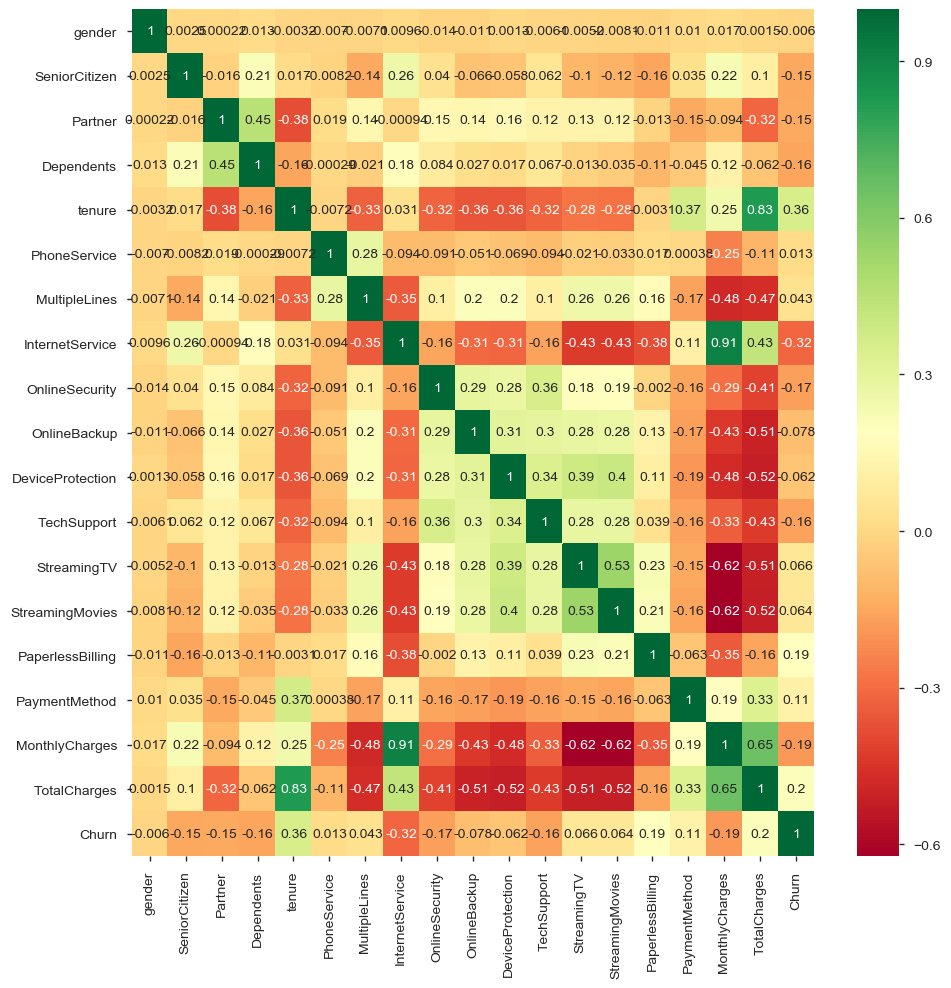

In [56]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (11,11))
g = sns.heatmap(data[top_corr_features].corr(),annot = True, cmap = "RdYlGn")

In [57]:
#feature selection
X = dataset.iloc[:, [4,15,18]].values
y = dataset.iloc[:, 19].values

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [59]:
logreg_classifier = LogisticRegression(solver ='liblinear', random_state = 42)
logreg_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
print('Accuracy of Logistic Regression classifier on test set:{:}'.format(logreg_classifier.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on test set:0.779460482725982


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg_prediction))

              precision    recall  f1-score   support

           0       0.69      0.34      0.46       577
           1       0.79      0.94      0.86      1536

    accuracy                           0.78      2113
   macro avg       0.74      0.64      0.66      2113
weighted avg       0.77      0.78      0.75      2113



In [67]:
#K nearest negihbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
print('Accuracy of KNN Classifier on test set:{:}'.format(knn_classifier.score(X_test, y_test)))

Accuracy of KNN Classifier on test set:0.7605300520586843


In [68]:
#printing F1score Knn
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.58      0.42      0.49       577
           1       0.80      0.89      0.84      1536

    accuracy                           0.76      2113
   macro avg       0.69      0.66      0.67      2113
weighted avg       0.74      0.76      0.75      2113



In [69]:
#naive bayes classifier
from sklearn.naive_bayes import GaussianNB
naivebayes_classifier = GaussianNB()
naivebayes_classifier.fit(X_train, y_train)
print('Accuracy of NB Classifier on test set:{:}'.format(naivebayes_classifier.score(X_test, y_test)))

Accuracy of NB Classifier on test set:0.7463322290582111


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, naivebayes_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.54      0.53      0.53       577
           1       0.82      0.83      0.83      1536

    accuracy                           0.75      2113
   macro avg       0.68      0.68      0.68      2113
weighted avg       0.74      0.75      0.75      2113

